In [166]:
%load_ext autoreload
%autoreload 2

# Model design
import agentpy as ap
import random

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython

from EnergyShedModel import EnergyShedModel
from plots import status_stackplot, cost_lineplot, transfer_lineplot, animation_plot

random.seed(1)

NUM_STEPS = 100

POP_SIZE = 16
GRID_SIZE = 4

SUNNY_PROB = 0.5
PERCENT_PRODUCERS = 0.5


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Grid agent

In [ ]:
parameters = {"population": POP_SIZE, "steps": NUM_STEPS, "grid_size": (GRID_SIZE, GRID_SIZE), "agent_type": "grid", "sunny_prob" : SUNNY_PROB, "percent_producers": PERCENT_PRODUCERS}

model = EnergyShedModel(parameters)
results = model.run()

In [ ]:
results.reporters
results.variables.EnergyShedModel

In [ ]:
fig, ax = plt.subplots()
status_stackplot(results.variables.EnergyShedModel, ax)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
cost_lineplot(results.variables.EnergyShedModel, ax=ax1)
transfer_lineplot(results.variables.EnergyShedModel, ax=ax2)
fig.suptitle("Grid Model")

In [ ]:
fig, ax = plt.subplots()
model = EnergyShedModel(parameters)
animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml())

# Reflex agents

In [ ]:
parameters = {"population": POP_SIZE, "steps": NUM_STEPS, "grid_size": (GRID_SIZE, GRID_SIZE), "agent_type": "reflex", "sunny_prob" : SUNNY_PROB, "percent_producers": PERCENT_PRODUCERS}

model = EnergyShedModel(parameters)
results = model.run()

In [ ]:
results.reporters

In [ ]:
fig, ax = plt.subplots()
status_stackplot(results.variables.EnergyShedModel, ax)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
cost_lineplot(results.variables.EnergyShedModel, ax=ax1)
transfer_lineplot(results.variables.EnergyShedModel, ax=ax2)
fig.suptitle("Reflex Model")

In [ ]:
fig, ax = plt.subplots()
model = EnergyShedModel(parameters)
animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml())

# Q-learning agent

In [168]:
parameters = {"population": POP_SIZE, "steps": NUM_STEPS, "grid_size": (GRID_SIZE, GRID_SIZE), "agent_type": "qlearning", "sunny_prob" : SUNNY_PROB, "percent_producers": PERCENT_PRODUCERS}

model = EnergyShedModel(parameters)
results = model.run()


Current state: (-1, False), Action: buy
Grid transfered: 10, Local transferred: 0
Energy balance: 0, Daily cost: -100
Reward: -100

Completed: 1 steps
Current state: (-1, False), Action: sell
Grid transfered: 0, Local transferred: 0
Energy balance: -10, Daily cost: -10
Reward: -210

Completed: 2 steps
Current state: (-1, False), Action: buy
Grid transfered: 10, Local transferred: 0
Energy balance: 0, Daily cost: -100
Reward: -100

Completed: 3 steps
Current state: (-1, True), Action: buy
Grid transfered: 10, Local transferred: 0
Energy balance: 0, Daily cost: -100
Reward: -100

Completed: 4 steps
Current state: (-1, True), Action: sell
Grid transfered: 0, Local transferred: 0
Energy balance: -10, Daily cost: -10
Reward: -210

Completed: 5 steps
Current state: (-1, True), Action: buy
Grid transfered: 10, Local transferred: 0
Energy balance: 0, Daily cost: -100
Reward: -100

Completed: 6 steps
Current state: (-1, True), Action: buy
Grid transfered: 2.5435073235313475, Local transferred:

In [148]:
results.reporters

,seed,Per household local energy transfer,Per household grid energy transfer,Peak energy production,Total Energy Production,Total local Transfer,Total grid Transfer,Number of producers,Total Cost
0,272996653310673477252411125948039410165,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[10, 2.684944112605619, 1.1713669334449257, 10...",120.544368,8372.626465,860.051709,7834.201965,9,-119378.614934


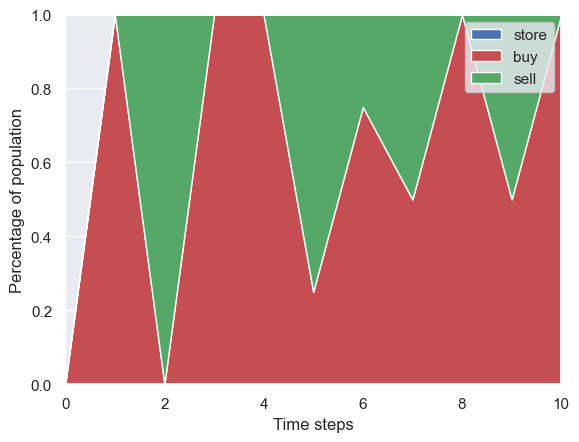

In [169]:
fig, ax = plt.subplots()
status_stackplot(results.variables.EnergyShedModel, ax)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, 'Q-Learning Model')

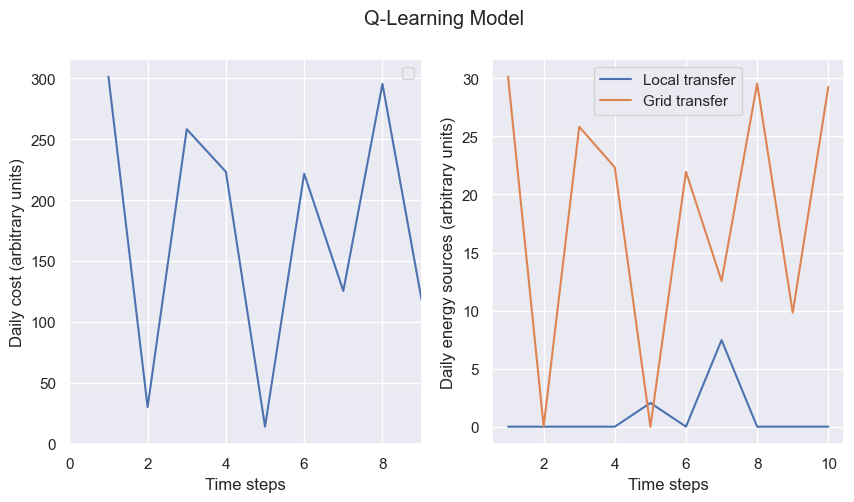

In [170]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
cost_lineplot(results.variables.EnergyShedModel, ax=ax1)
transfer_lineplot(results.variables.EnergyShedModel, ax=ax2)
fig.suptitle("Q-Learning Model")

In [171]:
fig, ax = plt.subplots()
model = EnergyShedModel(parameters)
animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml())


Current state: (-1.0, False), Action: buy
Grid transfered: 4.3988122270437415, Local transferred: 0
Energy balance: 0, Daily cost: -43.988122270437415
Reward: -43.988122270437415


Current state: (1.0, True), Action: buy
Grid transfered: 0.4732231445450523, Local transferred: 0
Energy balance: 0, Daily cost: -4.732231445450523
Reward: -4.732231445450523


Current state: (1.0, False), Action: sell
Grid transfered: 0, Local transferred: 0
Energy balance: 0.6880405434417298, Daily cost: 0.6880405434417298
Reward: 0.6880405434417298


Current state: (1.0, False), Action: sell
Grid transfered: 0, Local transferred: 0
Energy balance: 0, Daily cost: 1.1932087299981013
Reward: 1.1932087299981013


Current state: (-1.0, False), Action: sell
Grid transfered: 0, Local transferred: 0
Energy balance: -6.316385974953834, Daily cost: -6.316385974953834
Reward: -206.31638597495385


Current state: (1.0, True), Action: buy
Grid transfered: 0, Local transferred: 3.791696221727298
Energy balance: 0, Dai

# Experiments

In [ ]:
parameters = {
    "population": ap.IntRange(100, 1000),
    "number_of_neighbors": 4,
    "network_randomness": ap.Range(0.0, 1.0),
}

sample = ap.Sample(parameters, n=128, method="saltelli", calc_second_order=False)

In [ ]:
exp = ap.Experiment(EnergyShedModel, sample, iterations=10)
results = exp.run()

In [ ]:
results.save()

In [ ]:
results

In [ ]:
results.reporters.hist();

In [ ]:
# Sensitivity Analysis

In [ ]:
results.calc_sobol()

In [ ]:
def plot_sobol(results):
    """Bar plot of Sobol sensitivity indices."""

    sns.set()
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    si_list = results.sensitivity.sobol.groupby(by="reporter")
    si_conf_list = results.sensitivity.sobol_conf.groupby(by="reporter")

    for (key, si), (_, err), ax in zip(si_list, si_conf_list, axs):
        si = si.droplevel("reporter")
        err = err.droplevel("reporter")
        si.plot.barh(xerr=err, title=key, ax=ax, capsize=3)
        ax.set_xlim(0)

    axs[0].get_legend().remove()
    axs[1].set(ylabel=None, yticklabels=[])
    axs[1].tick_params(left=False)
    plt.tight_layout()


plot_sobol(results)

In [ ]:
def plot_sensitivity(results):
    """Show average simulation results for different parameter values."""

    sns.set()
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    axs = [i for j in axs for i in j]  # Flatten list

    data = results.arrange_reporters().astype("float")
    params = results.parameters.sample.keys()

    for x, ax in zip(params, axs):
        for y in results.reporters.columns:
            sns.regplot(x=x, y=y, data=data, ax=ax, ci=99, x_bins=15, fit_reg=False, label=y)
        ax.set_ylim(0, 1)
        ax.set_ylabel("")
        ax.legend()

    plt.tight_layout()


plot_sensitivity(results)